In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
data=pd.read_csv('mcdonalds.csv')

In [3]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
data.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [5]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [6]:
data.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [7]:
import category_encoders as ce

In [14]:
encoder=ce.OrdinalEncoder(cols=["yummy","convenient","spicy","fattening","greasy","fast","cheap","tasty","expensive","healthy","disgusting"])

In [15]:
data=encoder.fit_transform(data)

In [16]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,1,1,1,1,1,1,1,1,1,1,1,-3,61,Every three months,Female
1,2,1,1,1,2,1,1,2,1,1,1,+2,51,Every three months,Female
2,1,1,2,1,2,1,2,2,1,2,1,+1,62,Every three months,Female
3,2,1,1,1,2,1,1,2,2,1,2,+4,69,Once a week,Female
4,1,1,1,1,2,1,1,1,2,2,1,+2,49,Once a month,Male


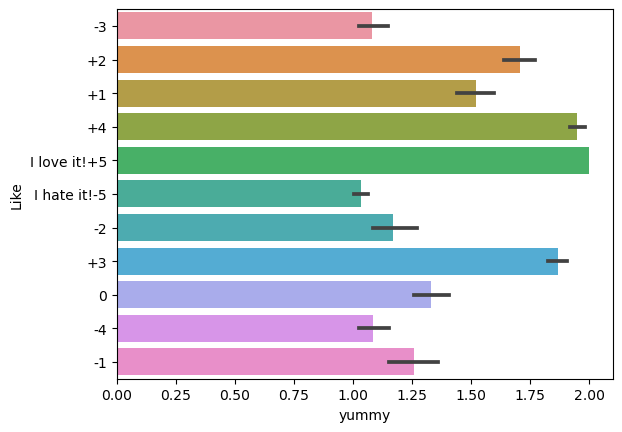

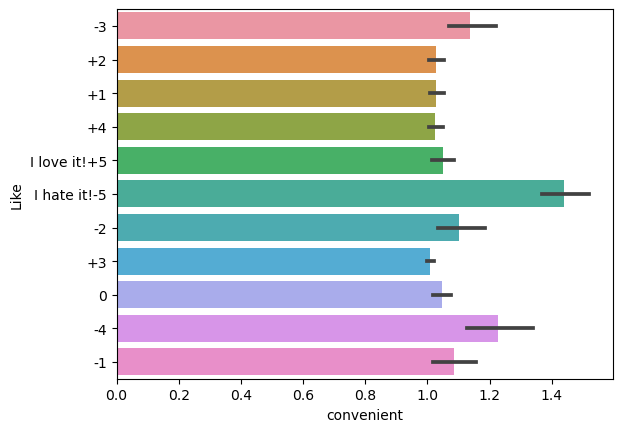

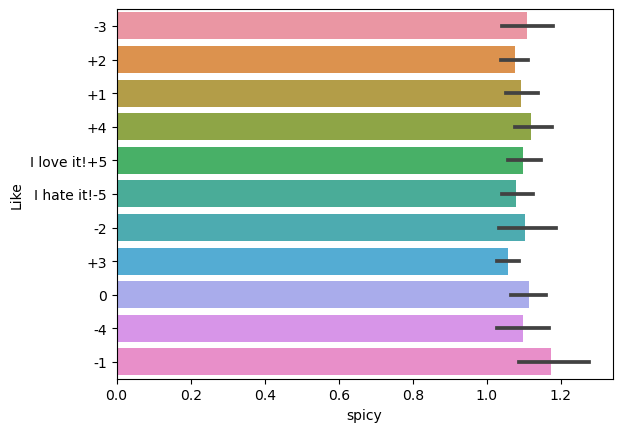

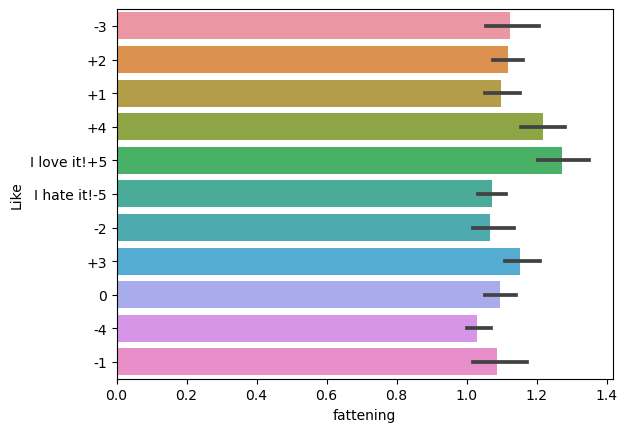

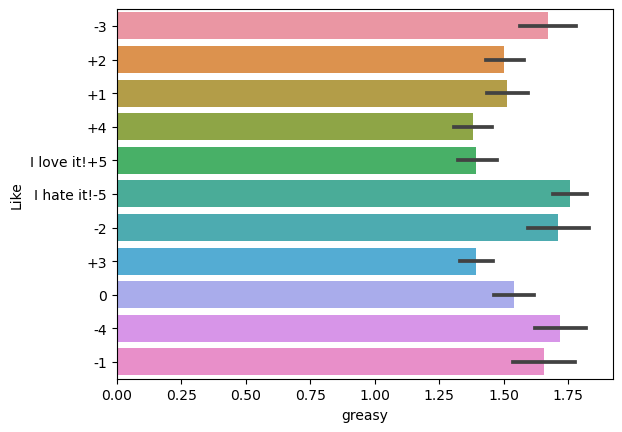

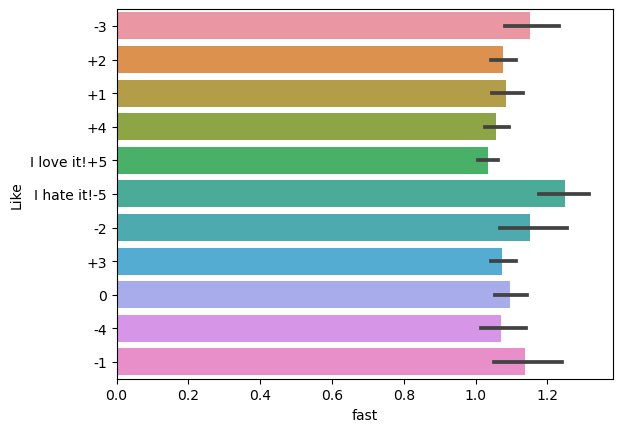

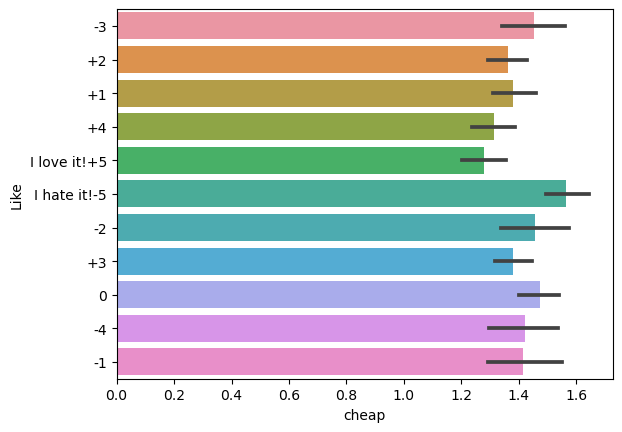

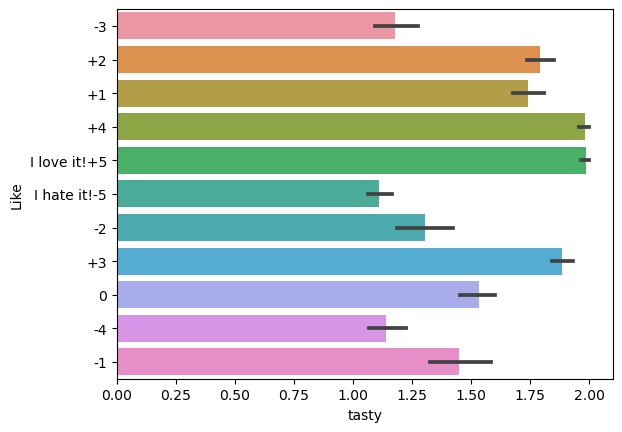

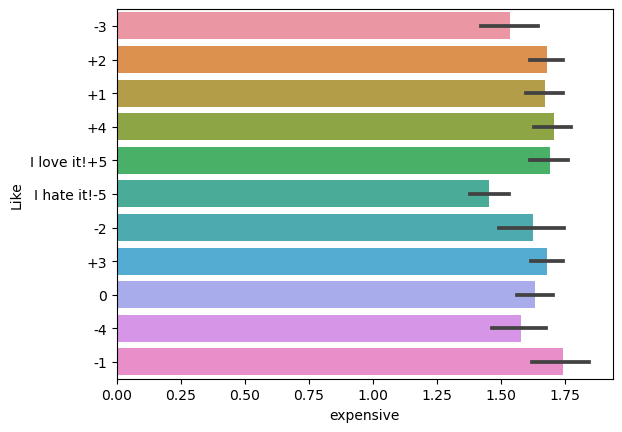

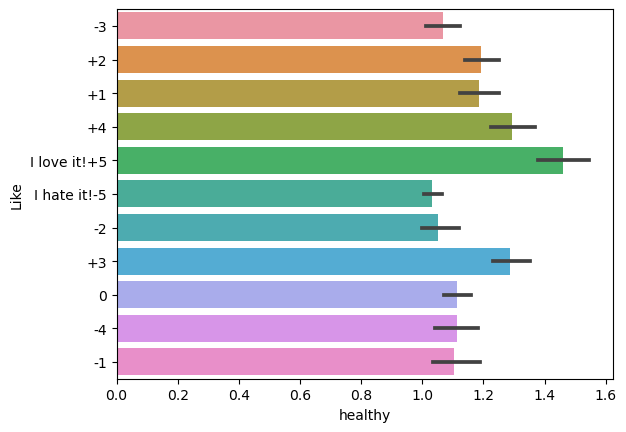

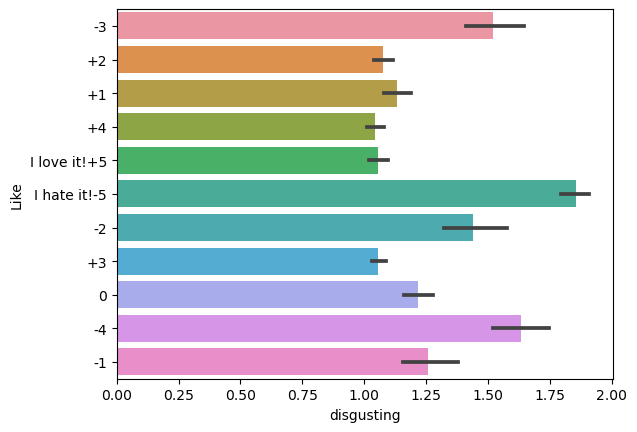

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [37]:
for i in data.columns:
    sns.barplot(data=data,y="Like",x=i)
    plt.show()

In [17]:
temp=["yummy","convenient","spicy","fattening","greasy","fast","cheap","tasty","expensive","healthy","disgusting"]

In [18]:
data_pca=data[temp]

In [20]:
data_pca.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,1,1,1,1,1,1,1,1,1,1,1
1,2,1,1,1,2,1,1,2,1,1,1
2,1,1,2,1,2,1,2,2,1,2,1
3,2,1,1,1,2,1,1,2,2,1,2
4,1,1,1,1,2,1,1,1,2,2,1


In [21]:
from sklearn.decomposition import PCA
pca=PCA()
pca_sum=pca.fit_transform(data_pca)

In [22]:
print("Principal Components:")
print(pca.components_)
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

Principal Components:
[[-0.47693349  0.15533159 -0.00635636 -0.11623168  0.3044427   0.10849325
   0.33718593 -0.47151394 -0.32904173 -0.21371062  0.37475293]
 [ 0.36378978 -0.016414    0.01880869  0.03409395 -0.06383884  0.0869722
   0.61063276  0.3073178  -0.60128596  0.07659344 -0.13965633]
 [-0.30444402  0.0625153  -0.03701866  0.32235949 -0.80237317  0.06464172
   0.14931026 -0.28726479 -0.02439661  0.19205128 -0.08857138]
 [ 0.0551622   0.14242496  0.19761927  0.35413876  0.2539601   0.09736269
  -0.11895823 -0.00254696 -0.06781599  0.76348804  0.36953871]
 [-0.30753507 -0.27760805  0.07062017  0.07340475  0.36139895 -0.10793025
   0.12897259 -0.21089912  0.00312457  0.28784553 -0.72920859]
 [ 0.17073819  0.34783006 -0.3550866   0.40651542  0.20934711  0.59463206
   0.10324067 -0.07691443  0.26134151 -0.17822612 -0.21087805]
 [-0.28051863  0.05973793  0.70763705  0.38594277  0.03616962  0.08684577
   0.04044934  0.36045348  0.06838452 -0.34961569 -0.02679159]
 [ 0.01304117  0.113

In [23]:
pca_sum

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

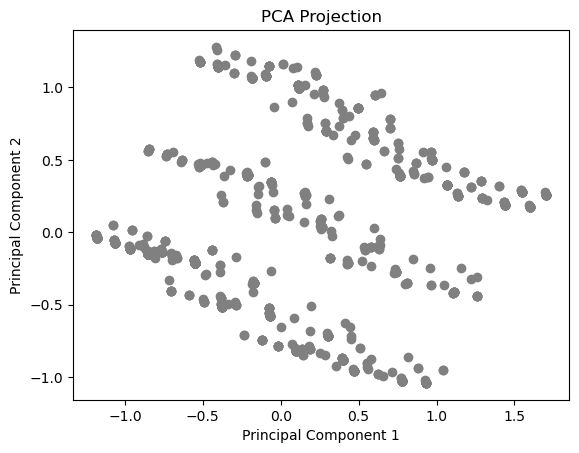

Principal Axes:
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00  1.00000000e+00 -1.71653862e-15 -2.22110303e-16
   2.62181413e-16  3.61658358e-16  7.71418088e-17  9.94972048e-16
  -6.16050402e-16 -1.83068562e-16 -1.35816166e-15]
 [-0.00000000e+00  1.77635088e-15  1.00000000e+00 -2.62183030e-15
  -1.68683639e-15 -5.03198012e-16  3.60637346e-16  7.16665170e-16
  -1.55617648e-16  1.03933199e-16 -7.24993469e-17]
 [ 0.00000000e+00  2.93816674e-16  2.62104193e-15  1.00000000e+00
   4.30300184e-15 -2.09092533e-15 -2.18434644e-15 -3.72189148e-15
  -1.70373798e-15 -4.07606546e-15 -1.45384623e-15]
 [-0.00000000e+00 -2.94567489e-16  1.75741396e-15 -3.84371037e-15
   1.00000000e+00  3.27388307e-14 -2.24284261e-15  2.90753217e-15
   2.42175001e-15  9.63305326e-15  5.85893615e-15]
 [ 0.00000000e+00 -3.76368831e-16  5.45759042e-16  1.44085422e-15
  -

In [24]:
import matplotlib.pyplot as plt
pca = PCA()
MD_pca_result = pca.fit_transform(pca_sum)

# Plot the PCA results
plt.scatter(MD_pca_result[:, 0], MD_pca_result[:, 1], color='grey')
plt.title('PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Display the principal axes
print("Principal Axes:")
print(pca.components_)

In [29]:
from sklearn.cluster import KMeans
np.random.seed(1234)

# Create a range of cluster numbers (2 to 8)
cluster_range = range(2, 9)

# Perform k-means clustering for each cluster number
best_k = None
best_kmeans_model = None
best_inertia = float('inf')
inertia_values = []
for k in cluster_range:
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans_model.fit(data_pca)
    inertia_values.append(kmeans_model.inertia_)
    # Save the model with the lowest inertia (sum of squared distances to the nearest cluster center)
    if kmeans_model.inertia_ < best_inertia:
        best_k = k
        best_inertia = kmeans_model.inertia_
        best_kmeans_model = kmeans_model
        
# Display the best number of clusters
print("Best Number of Clusters:", best_k)

# Relabel the clusters
MD_labels = best_kmeans_model.labels_

# Now MD_labels contains the cluster assignments for each data point

Best Number of Clusters: 8


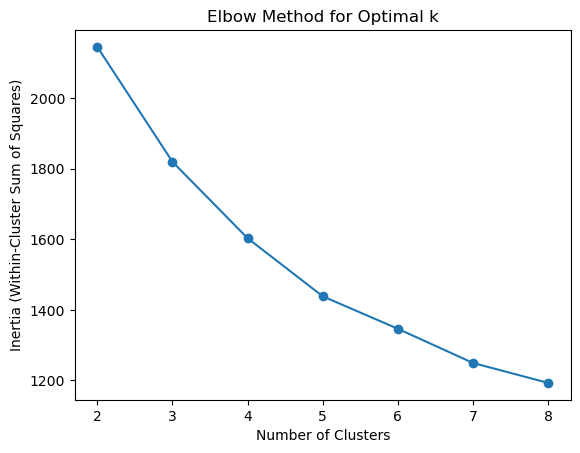

In [30]:
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()